In [1]:
import os
import sys
src_dir = os.path.join(os.getcwd(), '..', '..', '03-src')
sys.path.append(src_dir)

import decisionclass.decision_functions as hmd
import pandas as pd
from itertools import combinations
%matplotlib inline

In [2]:
example = hmd.Decision()

In [3]:
example.option_value_df

,option1,option2,option3,option4,percent,value
feature1,0,3,6,9,0.1,1.0
feature2,3,6,9,0,0.2,2.0
feature3,6,9,0,3,0.3,3.0
feature4,9,0,3,6,0.4,4.0


option1 meets 60.0% of your desired features.
option2 meets 42.0% of your desired features.
option3 meets 36.0% of your desired features.
option4 meets 42.0% of your desired features.


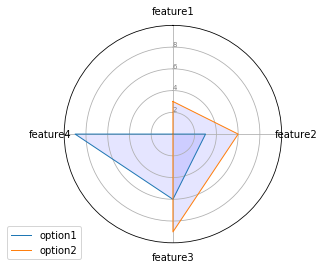

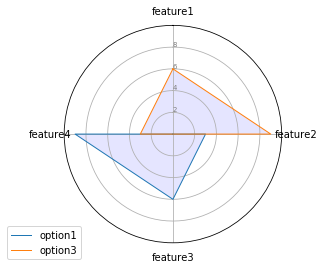

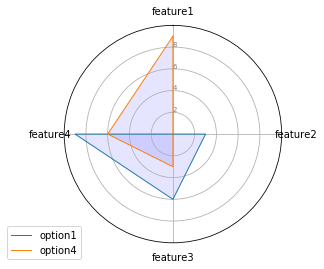

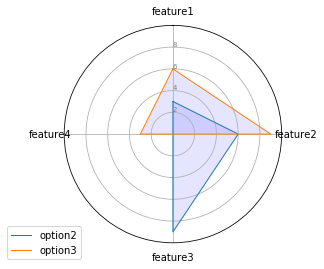

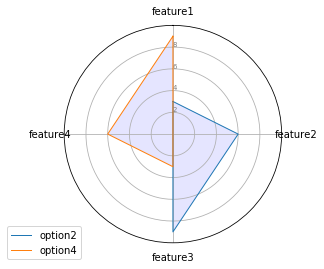

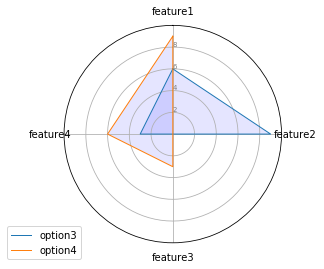

In [4]:
example.print_results()
example.plot_radar()
# example.plot_venn3()